# Proyek Analisis Data: [Bike Sharing Dataset]
- **Nama:** [Mutasar]
- **Email:** [mutasarstmik@gmail.com]
- **ID Dicoding:** [l319ywd083]

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1 : Apa faktor-faktor yang paling mempengaruhi kepuasan pelanggan berdasarkan ulasan dan rating produk?
- Pertanyaan 2 : Bagaimana pola pembelian pelanggan berubah selama periode tertentu?

## Import Semua Packages/Library yang Digunakan

In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
import streamlit as st
from babel.numbers import format_currency
sns.set(style='dark')


## Data Wrangling

### Gathering Data

In [6]:
day_df = pd.read_csv("https://raw.githubusercontent.com/Mutasar/pad/refs/heads/main/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [7]:
hour_df = pd.read_csv("https://raw.githubusercontent.com/Mutasar/pad/refs/heads/main/hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

**Pengujian data tabel day:**

In [8]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [9]:
day_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [10]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


In [11]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


**Pengujian Data Tabel Hour:**

In [12]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [13]:
hour_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


In [14]:
print("Jumlah duplikasi: ", hour_df.duplicated().sum())

Jumlah duplikasi:  0


In [15]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
- xxx
- xxx

### Cleaning Data

membersihkan tabel day :

Duplikat data :

In [16]:
day_df.duplicated().sum()

0

In [17]:
day_df.drop_duplicates(inplace=True)

In [18]:
print("Jumlah duplikasi: ",day_df.duplicated().sum())

Jumlah duplikasi:  0


Missing value

In [19]:
day_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [20]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


membersihkan tabel hour:

dulikat data :

In [21]:
hour_df.duplicated().sum()

0

In [22]:
print("Jumlah duplikasi: ",hour_df.duplicated().sum())

Jumlah duplikasi:  0


In [23]:
hour_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


In [24]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
- xxx
- xxx

## Exploratory Data Analysis (EDA)

Explore Data day :

In [25]:
day_df.sample(10)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
288,289,2011-10-16,4,0,10,0,0,0,1,0.511667,0.503154,0.486667,0.281717,1748,3293,5041
531,532,2012-06-15,2,1,6,0,5,1,1,0.639167,0.599754,0.589583,0.176617,1563,6102,7665
445,446,2012-03-21,2,1,3,0,3,1,2,0.531667,0.513258,0.821250,0.089558,1122,5108,6230
658,659,2012-10-20,4,1,10,0,6,0,1,0.484167,0.472842,0.572917,0.117537,2806,5284,8090
167,168,2011-06-17,2,0,6,0,5,1,1,0.649167,0.600383,0.735833,0.143029,863,3981,4844
471,472,2012-04-16,2,1,4,1,1,0,1,0.664167,0.614925,0.561667,0.284829,1198,5172,6370
476,477,2012-04-21,2,1,4,0,6,0,1,0.570000,0.542921,0.682917,0.283587,2541,4083,6624
104,105,2011-04-15,2,0,4,1,5,0,1,0.446667,0.441913,0.671250,0.226375,642,2484,3126
656,657,2012-10-18,4,1,10,0,4,1,2,0.522500,0.512625,0.728333,0.236937,1008,6501,7509
488,489,2012-05-03,2,1,5,0,4,1,2,0.560000,0.537242,0.768333,0.133696,764,5657,6421


In [26]:
day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,NaN,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,NaN,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000


In [27]:
day_df.instant.is_unique

True

In [28]:
day_df.groupby(by="holiday").instant.nunique().sort_values(ascending=False)

,instant
holiday,
0,710
1,21


In [29]:
day_df.groupby(by="weekday").instant.nunique().sort_values(ascending=False)

,instant
weekday,
0,105
1,105
6,105
2,104
3,104
4,104
5,104


Explore Data hour :

In [30]:
hour_df.sample(10)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
4235,4236,2011-06-30,3,0,6,9,0,4,1,1,0.70,0.6364,0.42,0.2239,33,227,260
8744,8745,2012-01-05,1,1,1,4,0,4,1,2,0.20,0.2273,0.59,0.0896,0,5,5
11281,11282,2012-04-20,2,1,4,6,0,5,1,1,0.42,0.4242,0.88,0.0000,8,105,113
6475,6476,2011-10-02,4,0,10,9,0,0,0,1,0.36,0.3333,0.76,0.3582,19,96,115
12163,12164,2012-05-27,2,1,5,0,0,0,0,2,0.68,0.6364,0.69,0.1642,48,89,137
14326,14327,2012-08-25,3,1,8,3,0,6,0,1,0.66,0.6212,0.69,0.0896,7,31,38
1073,1074,2011-02-17,1,0,2,11,0,4,1,2,0.44,0.4394,0.44,0.2537,19,71,90
14055,14056,2012-08-13,3,1,8,20,0,1,1,1,0.74,0.6818,0.62,0.2239,58,374,432
6652,6653,2011-10-09,4,0,10,18,0,0,0,1,0.64,0.6212,0.50,0.1045,186,228,414
16535,16536,2012-11-26,4,1,11,17,0,1,1,1,0.42,0.4242,0.32,0.0000,13,540,553


In [31]:
hour_df.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,NaN,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,NaN,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,NaN,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,NaN,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000


In [32]:
hour_df.instant.is_unique

True

In [33]:
hour_df.groupby(by="holiday").instant.nunique().sort_values(ascending=False)

,instant
holiday,
0,16879
1,500


In [34]:
hour_df.groupby(by="weekday").instant.nunique().sort_values(ascending=False)

,instant
weekday,
6,2512
0,2502
5,2487
1,2479
3,2475
4,2471
2,2453


<Axes: >

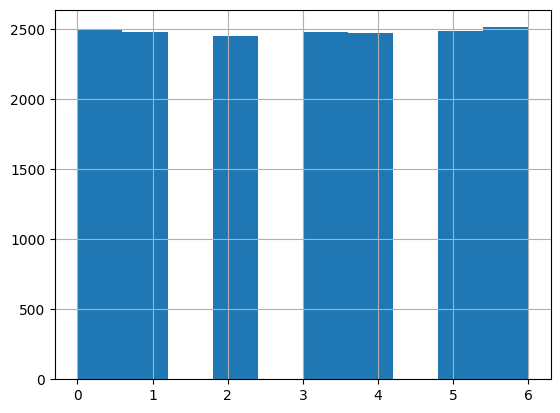

In [35]:
hour_df.weekday.hist()

Explore day_df & hour_df :

In [36]:
all_df = pd.merge(
    left = hour_df,
    right = day_df,
    how = "left",
    left_on = "instant",
    right_on = "instant"
)
all_df.head()



,instant,dteday_x,season_x,yr_x,mnth_x,hr,holiday_x,weekday_x,workingday_x,weathersit_x,...,weekday_y,workingday_y,weathersit_y,temp_y,atemp_y,hum_y,windspeed_y,casual_y,registered_y,cnt_y
0,1,2011-01-01,1,0,1,0,0,6,0,1,...,6.0,0.0,2.0,0.344167,0.363625,0.805833,0.160446,331.0,654.0,985.0
1,2,2011-01-01,1,0,1,1,0,6,0,1,...,0.0,0.0,2.0,0.363478,0.353739,0.696087,0.248539,131.0,670.0,801.0
2,3,2011-01-01,1,0,1,2,0,6,0,1,...,1.0,1.0,1.0,0.196364,0.189405,0.437273,0.248309,120.0,1229.0,1349.0
3,4,2011-01-01,1,0,1,3,0,6,0,1,...,2.0,1.0,1.0,0.200000,0.212122,0.590435,0.160296,108.0,1454.0,1562.0
4,5,2011-01-01,1,0,1,4,0,6,0,1,...,3.0,1.0,1.0,0.226957,0.229270,0.436957,0.186900,82.0,1518.0,1600.0


In [37]:
all_df.groupby(by=["instant", "weekday_x"]).agg({
    "temp_y": "sum",
    "cnt_y": "sum"
})


,,temp_y,cnt_y
instant,weekday_x,,
1,6,0.344167,985.0
2,6,0.363478,801.0
3,6,0.196364,1349.0
4,6,0.200000,1562.0
5,6,0.226957,1600.0
...,...,...,...
17375,1,0.000000,0.0
17376,1,0.000000,0.0
17377,1,0.000000,0.0


In [38]:
all_df.groupby(by=["instant", "holiday_x"]).agg({
    "hum_y": "sum",
    "cnt_y": "sum"
})

,,hum_y,cnt_y
instant,holiday_x,,
1,0,0.805833,985.0
2,0,0.696087,801.0
3,0,0.437273,1349.0
4,0,0.590435,1562.0
5,0,0.436957,1600.0
...,...,...,...
17375,0,0.000000,0.0
17376,0,0.000000,0.0
17377,0,0.000000,0.0


In [39]:
all_df.groupby(by=["instant", "holiday_y"]).agg({
    "weathersit_x": "sum",
    "cnt_y": "sum"
})

,,weathersit_x,cnt_y
instant,holiday_y,,
1,0.0,1,985.0
2,0.0,1,801.0
3,0.0,1,1349.0
4,0.0,1,1562.0
5,0.0,1,1600.0
...,...,...,...
727,0.0,1,2114.0
728,0.0,1,3095.0
729,0.0,1,1341.0


In [40]:
all_df.groupby(by=["instant", "holiday_x"]).agg({
    "weathersit_x": "sum",
    "cnt_y": "sum"
})

,,weathersit_x,cnt_y
instant,holiday_x,,
1,0,1,985.0
2,0,1,801.0
3,0,1,1349.0
4,0,1,1562.0
5,0,1,1600.0
...,...,...,...
17375,0,2,0.0
17376,0,2,0.0
17377,0,1,0.0


In [41]:
 all_df.groupby(by=["instant", "holiday_x"]).agg({
    "windspeed_y": "sum",
    "cnt_y": "sum"
})

,,windspeed_y,cnt_y
instant,holiday_x,,
1,0,0.160446,985.0
2,0,0.248539,801.0
3,0,0.248309,1349.0
4,0,0.160296,1562.0
5,0,0.186900,1600.0
...,...,...,...
17375,0,0.000000,0.0
17376,0,0.000000,0.0
17377,0,0.000000,0.0


In [59]:
all_df.to_csv("all_data.csv", index=False)

In [62]:
all_df.to_csv('mutasar_bike_sahring.csv', index=False)

# Mengunduh file CSV
files.download('mutasar_bike_sahring.csv')

NameError: name 'files' is not defined

### Explore ...

**Insight:**
- xxx
- xxx

## Visualization & Explanatory Analysis

1. Bagaimana pengaruh penyewaan sepeda saat liburan terhadap musim?

2. Bagaimana pengaruh penyewaan sepeda saat waktu santai?

In [43]:
all_df.sample(5)

,instant,dteday_x,season_x,yr_x,mnth_x,hr,holiday_x,weekday_x,workingday_x,weathersit_x,...,weekday_y,workingday_y,weathersit_y,temp_y,atemp_y,hum_y,windspeed_y,casual_y,registered_y,cnt_y
769,770,2011-02-04,1,0,2,12,0,5,1,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4961,4962,2011-07-30,3,0,7,15,0,6,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12818,12819,2012-06-23,3,1,6,7,0,6,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11406,11407,2012-04-25,2,1,4,11,0,3,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
786,787,2011-02-05,1,0,2,5,0,6,0,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [44]:
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [45]:

hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [46]:
all_df.sample(5)

,instant,dteday_x,season_x,yr_x,mnth_x,hr,holiday_x,weekday_x,workingday_x,weathersit_x,...,weekday_y,workingday_y,weathersit_y,temp_y,atemp_y,hum_y,windspeed_y,casual_y,registered_y,cnt_y
13581,13582,2012-07-25,3,1,7,2,0,3,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4698,4699,2011-07-19,3,0,7,16,0,2,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11899,11900,2012-05-16,2,1,5,0,0,3,1,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3317,3318,2011-05-23,2,0,5,3,0,1,1,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6846,6847,2011-10-17,4,0,10,20,0,1,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


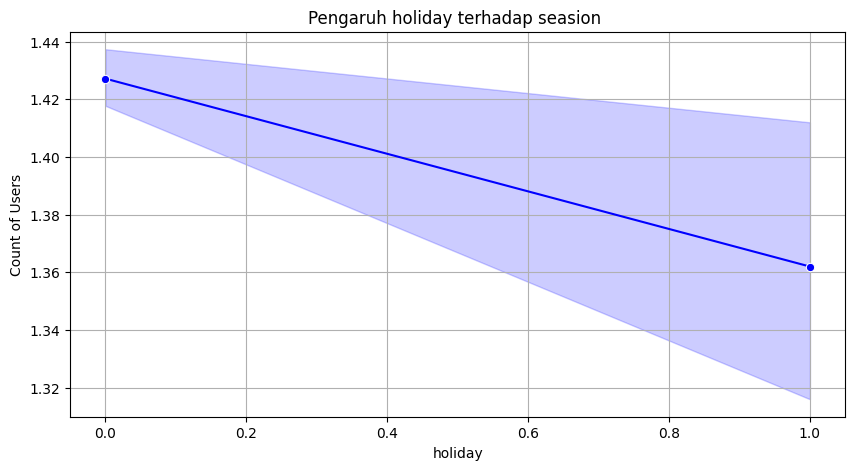

In [47]:
plt.figure(figsize=(10, 5))
# Membuat grafik garis
sns.lineplot(data=hour_df, x='holiday', y='weathersit', marker='o', color='b')
# Menambahkan judul dan label
plt.title('Pengaruh holiday terhadap seasion ')
plt.xlabel('holiday')
plt.ylabel('Count of Users')
plt.grid()

# Menampilkan grafik
plt.show()

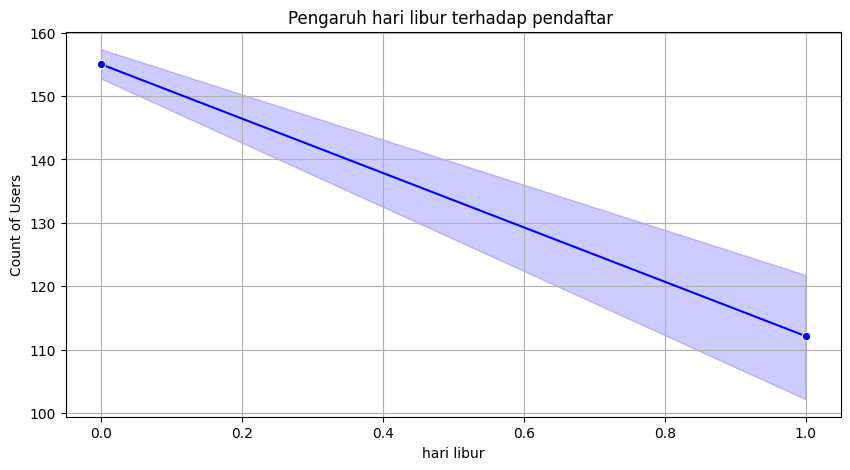

In [48]:
plt.figure(figsize=(10, 5))
# Membuat grafik garis
sns.lineplot(data=hour_df, x='holiday', y='registered', marker='o', color='b')
# Menambahkan judul dan label
plt.title('Pengaruh hari libur terhadap pendaftar ')
plt.xlabel('hari libur')
plt.ylabel('Count of Users')
plt.grid()

# Menampilkan grafik
plt.show()

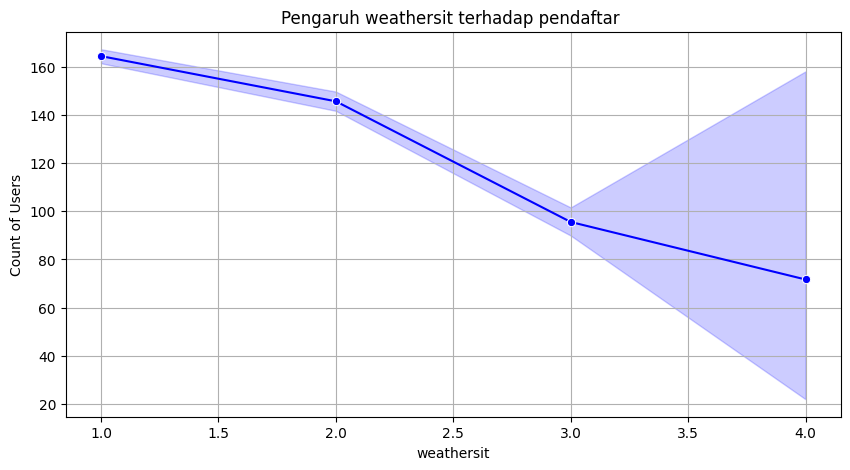

In [49]:

plt.figure(figsize=(10, 5))
# Membuat grafik garis
sns.lineplot(data=hour_df, x='weathersit', y='registered', marker='o', color='b')
# Menambahkan judul dan label
plt.title('Pengaruh weathersit terhadap pendaftar ')
plt.xlabel('weathersit')
plt.ylabel('Count of Users')
plt.grid()

# Menampilkan grafik
plt.show()

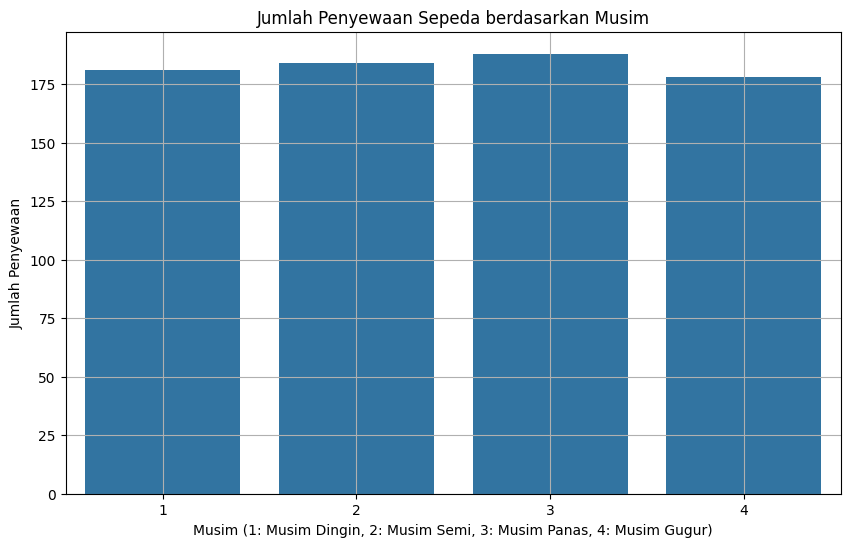

In [50]:
plt.figure(figsize=(10, 6))
sns.countplot(data=day_df, x='season', order=[1, 2, 3, 4])
plt.title('Jumlah Penyewaan Sepeda berdasarkan Musim')
plt.xlabel('Musim (1: Musim Dingin, 2: Musim Semi, 3: Musim Panas, 4: Musim Gugur)')
plt.ylabel('Jumlah Penyewaan')
plt.grid()
plt.show()

waktu yang banyak peminat sewa sepeda

In [52]:

all_df = pd.merge(
    left=day_df,
    right=hour_df,
    how="left",
    left_on="weathersit",
    right_on="cnt"
)
all_df.head()

,instant_x,dteday_x,season_x,yr_x,mnth_x,holiday_x,weekday_x,workingday_x,weathersit_x,temp_x,...,weekday_y,workingday_y,weathersit_y,temp_y,atemp_y,hum_y,windspeed_y,casual_y,registered_y,cnt_y
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.22,0.2727,0.80,0.0000,2,0,2
1,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,0,0,3,0.42,0.4242,0.77,0.2985,0,2,2
2,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,1,1,1,0.20,0.1667,0.44,0.4179,0,2,2
3,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,2,1,1,0.16,0.1818,0.59,0.1045,0,2,2
4,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,2,1,1,0.14,0.1818,0.63,0.0896,0,2,2


<ipython-input-56-f5fc32ade363>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = hour_df, x='hr', y='cnt', palette='viridis')


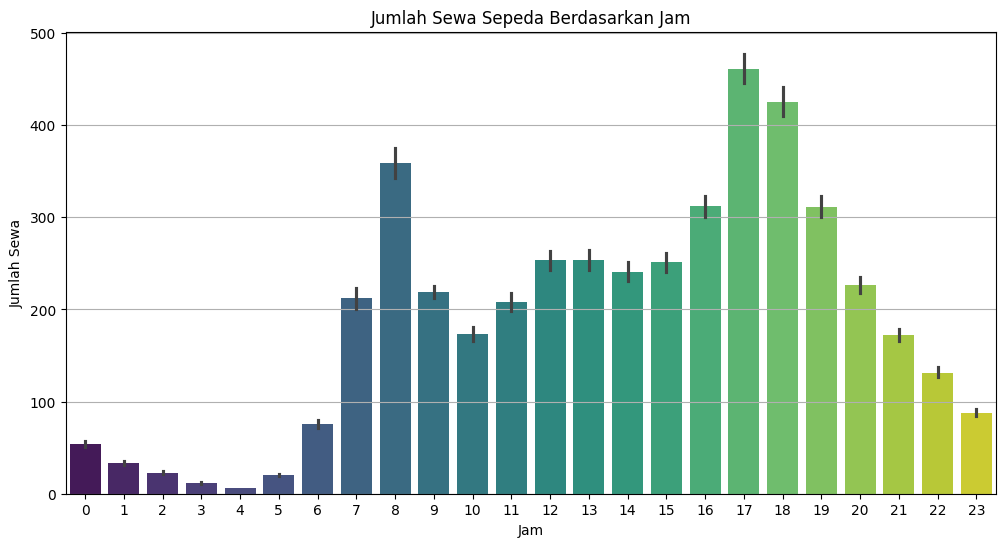

In [56]:
plt.figure(figsize=(12, 6))

sns.barplot(data = hour_df, x='hr', y='cnt', palette='viridis')

plt.title('Jumlah Sewa Sepeda Berdasarkan Jam')
plt.xlabel('Jam')
plt.ylabel('Jumlah Sewa')
plt.xticks(range(0, 24))
plt.grid(axis='y')


plt.show()

**Insight:**
- xxx
- xxx

## Analisis Lanjutan (Opsional)

## Conclusion

- Conclution pertanyaan 1
- Conclution pertanyaan 2